In [1]:
import platform
import PIL  # Pillow 包通常在 Python 中以 PIL 名称导入
import jupyterlab
import matplotlib
import ipympl
# 打印 Python 版本
print("Python version:", platform.python_version())

# 打印 Pillow 版本
print("Pillow version:", PIL.__version__)

# 打印 JupyterLab 版本
print("JupyterLab version:", jupyterlab.__version__)

# 打印 matplotlib 版本
print("matplotlib version:", matplotlib.__version__)

# 打印 ipympl 版本
print("ipympl version:", ipympl.__version__)




Python version: 3.10.16
Pillow version: 11.1.0
JupyterLab version: 4.3.5
matplotlib version: 3.10.0
ipympl version: 0.9.6


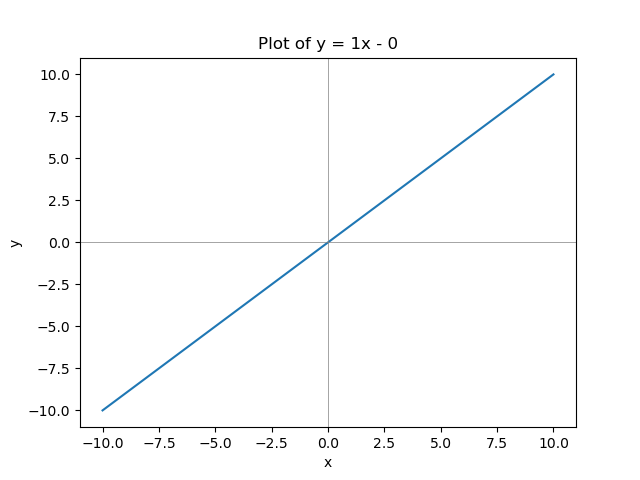

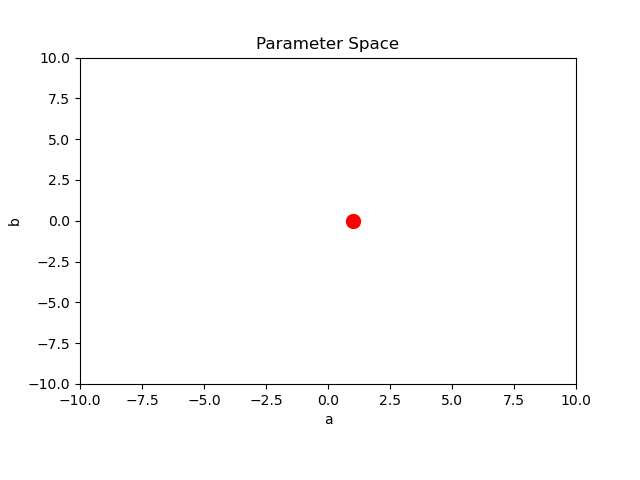

In [2]:
%matplotlib ipympl 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button

# Initial parameters
initial_a = 1
initial_b = 0

# Create the parameter space figure
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.2)

# Parameter space plot
param_space, = ax.plot(initial_a, initial_b, 'ro', markersize=10)
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_title('Parameter Space')

# Create the y = ax - b plot
fig2, ax2 = plt.subplots()
x = np.linspace(-10, 10, 400)
line, = ax2.plot(x, initial_a * x - initial_b)
ax2.axhline(0, color='grey', lw=0.5)
ax2.axvline(0, color='grey', lw=0.5)
ax2.set_title(f'Plot of y = {initial_a}x - {initial_b}')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

# Function to update the line plot
def update_plot(a, b):
    y = a * x - b
    line.set_ydata(y)
    ax2.set_title(f'Plot of y = {a}x - {b}')
    fig2.canvas.draw()

# Function to handle mouse click events
def on_click(event):
    if event.inaxes == ax:
        param_space.set_data(event.xdata, event.ydata)
        update_plot(event.xdata, event.ydata)
        fig.canvas.draw()

# Connect the event handler
fig.canvas.mpl_connect('button_press_event', on_click)

# Show the plots
plt.show()


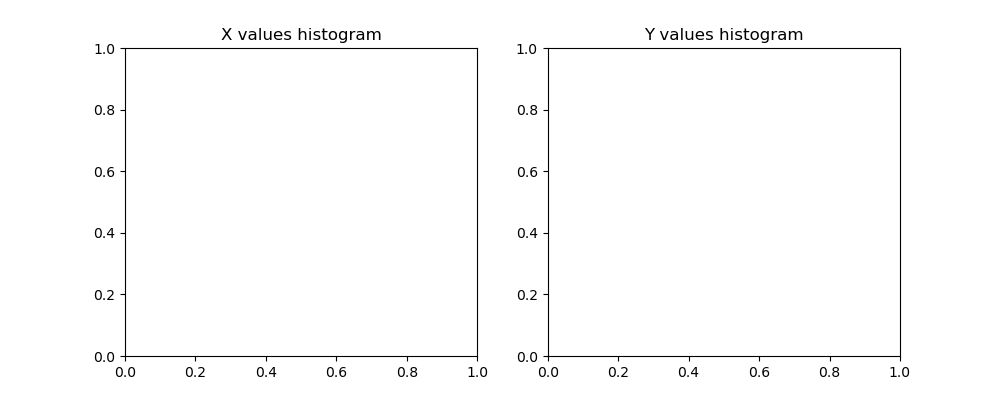

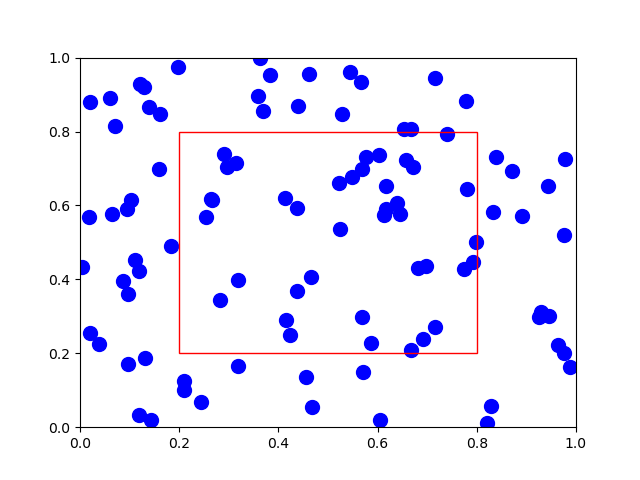

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.path import Path

# Generate random data
np.random.seed(0)
x = np.random.rand(100)
y = np.random.rand(100)

# Scatter plot of points
fig, ax = plt.subplots()
sc = ax.scatter(x, y, s=100, c='blue')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Initial polygon
polygon_vertices = np.array([[0.2, 0.2], [0.8, 0.2], [0.8, 0.8], [0.2, 0.8]])
polygon = Polygon(polygon_vertices, closed=True, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(polygon)

# Histograms
fig_hist, (ax_histx, ax_histy) = plt.subplots(1, 2, figsize=(10, 4))
ax_histx.set_title('X values histogram')
ax_histy.set_title('Y values histogram')

# Variables to store dragging state
dragging_vertex = None

def update_histograms():
    enclosed_x = []
    enclosed_y = []
    path = Path(polygon.get_xy())
    for i in range(len(x)):
        if path.contains_point((x[i], y[i])):
            enclosed_x.append(x[i])
            enclosed_y.append(y[i])

    ax_histx.clear()
    ax_histx.hist(enclosed_x, bins=10, color='blue', alpha=0.7)
    ax_histx.set_title('X values histogram')

    ax_histy.clear()
    ax_histy.hist(enclosed_y, bins=10, color='green', alpha=0.7)
    ax_histy.set_title('Y values histogram')

    fig_hist.canvas.draw()

def on_press(event):
    global dragging_vertex
    if event.inaxes != ax:
        return
    for i, (vx, vy) in enumerate(polygon.get_xy()):
        if np.hypot(event.xdata - vx, event.ydata - vy) < 0.05:
            dragging_vertex = i
            break

def on_release(event):
    global dragging_vertex
    dragging_vertex = None

def on_motion(event):
    global dragging_vertex
    if dragging_vertex is None:
        return
    if event.inaxes != ax:
        return
    polygon_vertices[dragging_vertex] = [event.xdata, event.ydata]
    polygon.set_xy(polygon_vertices)

    fig.canvas.draw()
    update_histograms()

fig.canvas.mpl_connect('button_press_event', on_press)
fig.canvas.mpl_connect('button_release_event', on_release)
fig.canvas.mpl_connect('motion_notify_event', on_motion)

plt.show()


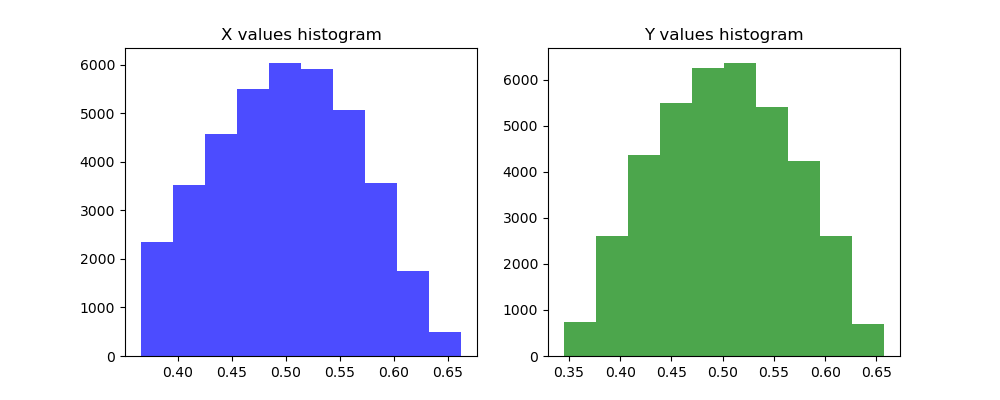

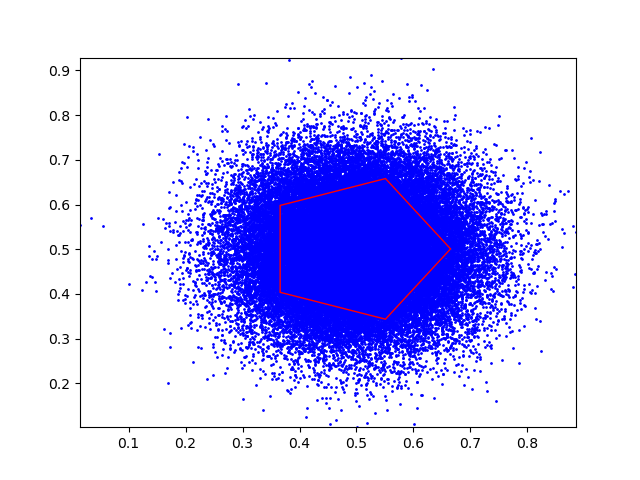

In [ ]:
# # Wrap it up as a function

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.patches import Polygon
# from matplotlib.path import Path

# def interactive_polygon_histograms(dataframe, x_col, y_col, num_edges=4):
#     x = dataframe[x_col].values
#     y = dataframe[y_col].values

#     # Scatter plot of points (using a small marker size for visibility)
#     fig, ax = plt.subplots()
#     sc = ax.scatter(x, y, s=1, c='blue')
#     ax.set_xlim(min(x), max(x))
#     ax.set_ylim(min(y), max(y))

#     # Initial polygon vertices
#     theta = np.linspace(0, 2*np.pi, num_edges, endpoint=False)
#     radius = 0.2 * min(max(x) - min(x), max(y) - min(y))
#     polygon_vertices = np.column_stack((radius * np.cos(theta) + np.mean(x), radius * np.sin(theta) + np.mean(y)))
#     polygon = Polygon(polygon_vertices, closed=True, linewidth=1, edgecolor='r', facecolor='none')
#     ax.add_patch(polygon)

#     # Histograms
#     fig_hist, (ax_histx, ax_histy) = plt.subplots(1, 2, figsize=(10, 4))
#     ax_histx.set_title('X values histogram')
#     ax_histy.set_title('Y values histogram')

#     # Variables to store dragging state
#     dragging_vertex = None
#     update_needed = True

#     def update_histograms():
#         enclosed_x = []
#         enclosed_y = []
#         path = Path(polygon.get_xy())
#         for i in range(len(x)):
#             if path.contains_point((x[i], y[i])):
#                 enclosed_x.append(x[i])
#                 enclosed_y.append(y[i])

#         ax_histx.clear()
#         ax_histx.hist(enclosed_x, bins=10, color='blue', alpha=0.7)
#         ax_histx.set_title('X values histogram')

#         ax_histy.clear()
#         ax_histy.hist(enclosed_y, bins=10, color='green', alpha=0.7)
#         ax_histy.set_title('Y values histogram')

#         fig_hist.canvas.draw()

#     def on_press(event):
#         nonlocal dragging_vertex
#         if event.inaxes != ax:
#             return
#         for i, (vx, vy) in enumerate(polygon.get_xy()):
#             if np.hypot(event.xdata - vx, event.ydata - vy) < 0.05:
#                 dragging_vertex = i
#                 break

#     def on_release(event):
#         nonlocal dragging_vertex
#         dragging_vertex = None
#         update_histograms()

#     def on_motion(event):
#         nonlocal dragging_vertex
#         if dragging_vertex is None:
#             return
#         if event.inaxes != ax:
#             return
#         polygon_vertices[dragging_vertex] = [event.xdata, event.ydata]
#         polygon.set_xy(polygon_vertices)

#         fig.canvas.draw()

#     fig.canvas.mpl_connect('button_press_event', on_press)
#     fig.canvas.mpl_connect('button_release_event', on_release)
#     fig.canvas.mpl_connect('motion_notify_event', on_motion)

#     # Initial update of the histograms
#     update_histograms()

#     plt.show()

# # Generate example dataframe
# np.random.seed(0)
# data = {
#     'x': np.random.normal(0.5, 0.1, 60000),
#     'y': np.random.normal(0.5, 0.1, 60000)
# }
# df = pd.DataFrame(data)

# # Call the function with the example dataframe
# interactive_polygon_histograms(df, 'x', 'y', num_edges=5)


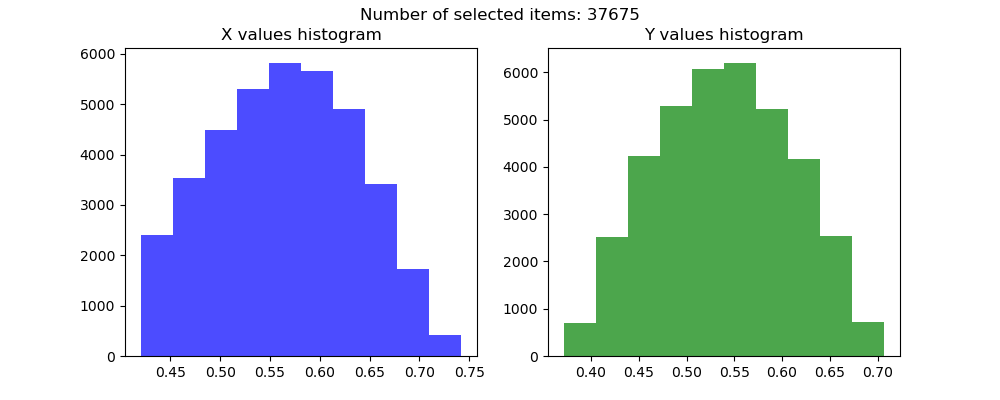

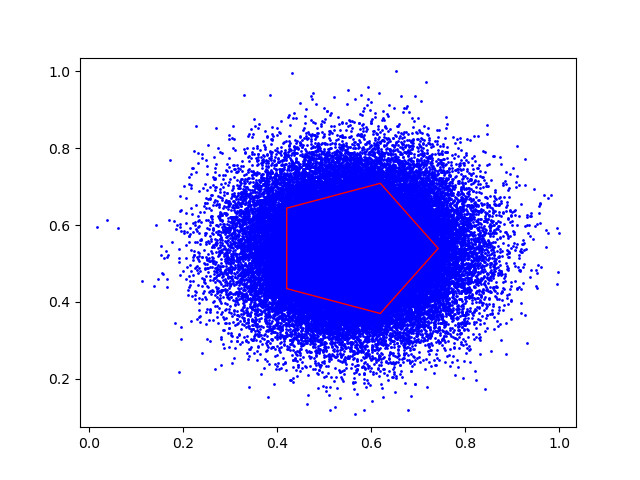

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.path import Path



def interactive_polygon_histograms(dataframe, x_col, y_col, num_edges=4):

    selected_data = None
    x = dataframe[x_col].values
    y = dataframe[y_col].values

    # Normalize the data
    x_min, x_max = min(x), max(x)
    y_min, y_max = min(y), max(y)
    x = x / x_max 
    y = y / y_max

    # Scatter plot of points (using a small marker size for visibility)
    fig, ax = plt.subplots()
    sc = ax.scatter(x, y, s=1, c='blue')

    # Initial polygon vertices
    theta = np.linspace(0, 2*np.pi, num_edges, endpoint=False)
    radius = 0.2 * min(max(x) - min(x), max(y) - min(y))
    polygon_vertices = np.column_stack((radius * np.cos(theta) + np.mean(x), radius * np.sin(theta) + np.mean(y)))
    polygon = Polygon(polygon_vertices, closed=True, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(polygon)

    # Set limits with padding
    padding = 0.2 * radius
    ax.set_xlim(min(x) - padding, max(x) + padding)
    ax.set_ylim(min(y) - padding, max(y) + padding)

    # Histograms
    fig_hist, (ax_histx, ax_histy) = plt.subplots(1, 2, figsize=(10, 4))
    ax_histx.set_title('X values histogram')
    ax_histy.set_title('Y values histogram')

    # Variables to store dragging state
    dragging_vertex = None
    update_needed = True

    def update_histograms():
        nonlocal selected_data
        enclosed_indices = []
        path = Path(polygon.get_xy())
        for i in range(len(x)):
            if path.contains_point((x[i], y[i])):
                enclosed_indices.append(i)
        selected_data = dataframe.iloc[enclosed_indices]

        ax_histx.clear()
        ax_histx.hist(x[enclosed_indices], bins=10, color='blue', alpha=0.7)
        ax_histx.set_title('X values histogram')

        ax_histy.clear()
        ax_histy.hist(y[enclosed_indices], bins=10, color='green', alpha=0.7)
        ax_histy.set_title('Y values histogram')

        fig_hist.suptitle(f"Number of selected items: {len(enclosed_indices)}")
        fig_hist.canvas.draw()


    def on_press(event):
        nonlocal dragging_vertex
        if event.inaxes != ax:
            return
        for i, (vx, vy) in enumerate(polygon.get_xy()):
            if np.hypot(event.xdata - vx, event.ydata - vy) < 0.05:
                dragging_vertex = i
                break

    def on_release(event):
        nonlocal dragging_vertex
        dragging_vertex = None
        update_histograms()

    def on_motion(event):
        nonlocal dragging_vertex
        if dragging_vertex is None:
            return
        if event.inaxes != ax:
            return
        polygon_vertices[dragging_vertex] = [event.xdata, event.ydata]
        polygon.set_xy(polygon_vertices)

        fig.canvas.draw()

    fig.canvas.mpl_connect('button_press_event', on_press)
    fig.canvas.mpl_connect('button_release_event', on_release)
    fig.canvas.mpl_connect('motion_notify_event', on_motion)

    # Initial update of the histograms
    update_histograms()

    plt.show()
    return selected_data

# Generate example dataframe
np.random.seed(0)
data = {
    'x': np.random.normal(0.5, 0.1, 60000),
    'y': np.random.normal(0.5, 0.1, 60000)
}
df = pd.DataFrame(data)

# Call the function with the example dataframe
selector = interactive_polygon_histograms(df, 'x', 'y', num_edges=5)


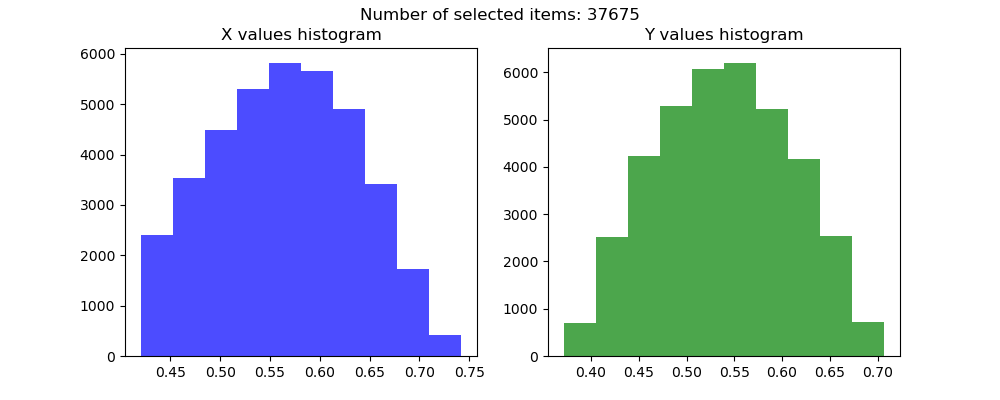

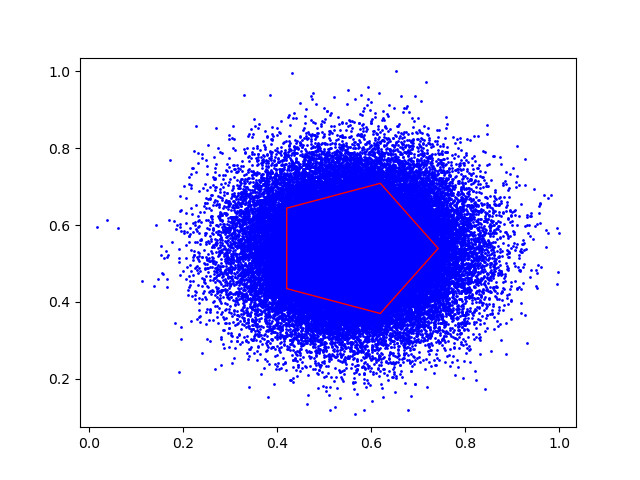

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import Polygon

class InteractivePolygonGating:
    def __init__(self, dataframe, x_col, y_col, num_edges=4):
        self.df = dataframe
        self.x_col = x_col
        self.y_col = y_col
        self.num_edges = num_edges
        self.selected_data = None

        self.x = self.df[self.x_col].values
        self.y = self.df[self.y_col].values
        self.x /= self.x.max()
        self.y /= self.y.max()

        plt.ion()  # Enable interactive mode

        self.fig, self.ax = plt.subplots()
        self.ax.scatter(self.x, self.y, s=1, c='blue')

        # Initial polygon
        theta = np.linspace(0, 2*np.pi, self.num_edges, endpoint=False)
        radius = 0.2 * min(self.x.max() - self.x.min(), self.y.max() - self.y.min())
        cx, cy = np.mean(self.x), np.mean(self.y)
        self.polygon_vertices = np.column_stack((radius * np.cos(theta) + cx,
                                                 radius * np.sin(theta) + cy))
        self.polygon = Polygon(self.polygon_vertices, closed=True, linewidth=1, 
                               edgecolor='r', facecolor='none')
        self.ax.add_patch(self.polygon)

        pad = 0.2 * radius
        self.ax.set_xlim(self.x.min() - pad, self.x.max() + pad)
        self.ax.set_ylim(self.y.min() - pad, self.y.max() + pad)

        self.fig_hist, (self.ax_histx, self.ax_histy) = plt.subplots(1, 2, figsize=(10, 4))
        self.dragging_vertex = None

        self.update_histograms()

        self.fig.canvas.mpl_connect('button_press_event', self.on_press)
        self.fig.canvas.mpl_connect('button_release_event', self.on_release)
        self.fig.canvas.mpl_connect('motion_notify_event', self.on_motion)

        # Non-blocking show so the object remains accessible
        plt.show(block=False)

    def on_press(self, event):
        if event.inaxes != self.ax:
            return
        for i, (vx, vy) in enumerate(self.polygon.get_xy()):
            if np.hypot(event.xdata - vx, event.ydata - vy) < 0.05:
                self.dragging_vertex = i
                break

    def on_release(self, event):
        self.dragging_vertex = None
        self.update_histograms()

    def on_motion(self, event):
        if self.dragging_vertex is None or event.inaxes != self.ax:
            return
        self.polygon_vertices[self.dragging_vertex] = [event.xdata, event.ydata]
        self.polygon.set_xy(self.polygon_vertices)
        self.fig.canvas.draw()

    def update_histograms(self):
        enclosed_indices = []
        path = Path(self.polygon.get_xy())
        for i in range(len(self.x)):
            if path.contains_point((self.x[i], self.y[i])):
                enclosed_indices.append(i)
        self.selected_data = self.df.iloc[enclosed_indices]

        self.ax_histx.clear()
        self.ax_histx.hist(self.x[enclosed_indices], bins=10, color='blue', alpha=0.7)
        self.ax_histx.set_title('X values histogram')

        self.ax_histy.clear()
        self.ax_histy.hist(self.y[enclosed_indices], bins=10, color='green', alpha=0.7)
        self.ax_histy.set_title('Y values histogram')

        self.fig_hist.suptitle(f"Number of selected items: {len(enclosed_indices)}")
        self.fig_hist.canvas.draw()


# Example usage:
if __name__ == "__main__":
    np.random.seed(0)
    data = {
        'x': np.random.normal(0.5, 0.1, 60000),
        'y': np.random.normal(0.5, 0.1, 60000)
    }
    df = pd.DataFrame(data)

    gating = InteractivePolygonGating(df, 'x', 'y', num_edges=5)
    # Now gating.selected_data updates as you drag the polygon.

          FSC-H         FSC-A         SSC-H         SSC-A        FL5-H  \
0  1.245440e+06  1.137749e+06  1.086676e+06  1.028578e+06   896.400024   
1  7.647308e+05  6.140952e+05  9.600986e+05  9.628853e+05   881.700012   
2  8.269922e+05  7.753288e+05  1.360484e+06  1.991305e+06  1384.400024   
3  7.939202e+05  6.101078e+05  3.554681e+05  3.603632e+05   584.400024   
4  6.853442e+05  5.623178e+05  4.422121e+05  4.119752e+05  1272.400024   

        FL5-A      FL11-H      FL11-A       FL8-H       FL8-A   FSC-Width  \
0  -62.700001  154.600006   67.500000  608.700012  356.299988  935.456116   
1 -147.800003  281.799988  322.899994  430.899994   27.700001  822.296021   
2  682.299988  506.600006  420.500000  352.700012   88.300003  960.029114   
3 -353.700012  330.600006   20.000000  312.700012   64.800003  786.918152   
4   26.299999  250.600006  137.000000  296.700012 -113.699997  840.181152   

           Time  
0  29919.144531  
1  30455.144531  
2  30782.144531  
3  31684.144531  
4 

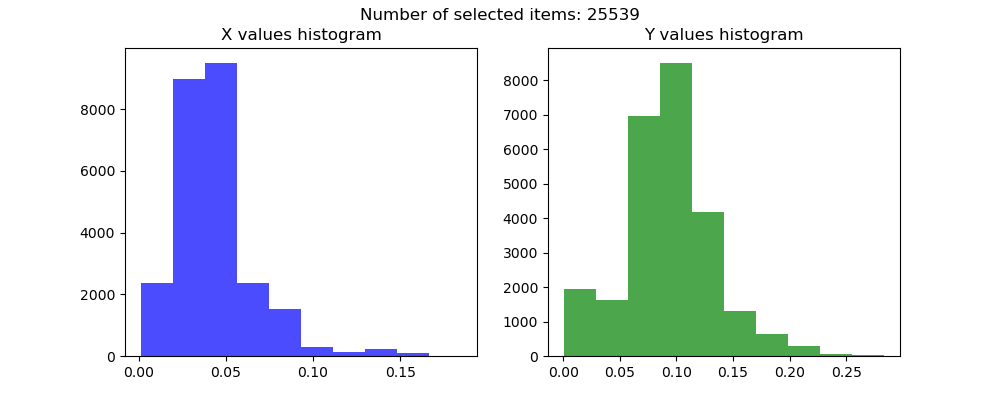

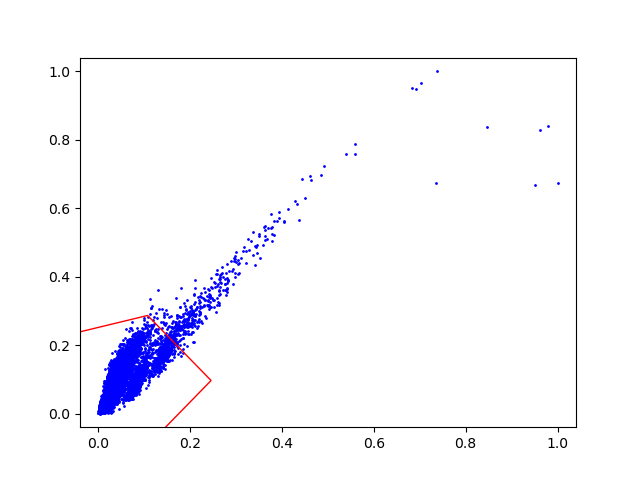

In [6]:
import FlowCal
import pandas as pd

# Read the .facs file
file_path = r'/Volumes/khammash/MC/cytoflex/Exp_20240417/Exp_20240417_1/data/01-016_high-G1.fcs'
data = FlowCal.io.FCSData(file_path)

# Convert to a pandas DataFrame
df = pd.DataFrame(data, columns=data.channels)
print(df.head())

# Filter the DataFrame

filtered_df = df[(df['FSC-A'] > 0) & (df['SSC-A'] > 0)]

# selector = InteractivePolygonSelector(df, 'FSC-A', 'SSC-A', num_edges=5, log_log=True)
gate1 = InteractivePolygonGating(filtered_df, 'FSC-A', 'SSC-A', num_edges=5)

In [64]:
df2 = gate1.selected_data
df2

,FSC-H,FSC-A,SSC-H,SSC-A,FL5-H,FL5-A,FL11-H,FL11-A,FL8-H,FL8-A,FSC-Width,Time
0,1.245440e+06,0.010112,1.086676e+06,0.008615,896.400024,-62.700001,154.600006,67.500000,608.700012,356.299988,935.456116,2.991914e+04
1,7.647308e+05,0.005458,9.600986e+05,0.008065,881.700012,-147.800003,281.799988,322.899994,430.899994,27.700001,822.296021,3.045514e+04
2,8.269922e+05,0.006891,1.360484e+06,0.016679,1384.400024,682.299988,506.600006,420.500000,352.700012,88.300003,960.029114,3.078214e+04
3,7.939202e+05,0.005423,3.554681e+05,0.003018,584.400024,-353.700012,330.600006,20.000000,312.700012,64.800003,786.918152,3.168414e+04
4,6.853442e+05,0.004998,4.422121e+05,0.003451,1272.400024,26.299999,250.600006,137.000000,296.700012,-113.699997,840.181152,3.204914e+04
...,...,...,...,...,...,...,...,...,...,...,...,...
25960,3.043412e+06,0.057368,5.653064e+06,0.158038,7204.700195,11239.299805,2832.100098,5274.299805,621.799988,608.700012,2171.784424,1.698905e+06
25961,2.122984e+06,0.035162,5.651178e+06,0.119996,6185.899902,9812.299805,1533.300049,2814.500000,419.000000,395.799988,1908.235229,1.698943e+06
25962,2.960856e+06,0.039078,5.609652e+06,0.069173,5631.700195,6293.700195,946.099976,1462.599976,414.600006,325.200012,1520.624023,1.699458e+06
25963,3.236555e+06,0.059445,5.653456e+06,0.119545,4781.500000,7572.899902,1426.099976,2293.199951,541.099976,279.100006,2116.115967,1.699500e+06


In [62]:
 gate1.selected_data

,FSC-H,FSC-A,SSC-H,SSC-A,FL5-H,FL5-A,FL11-H,FL11-A,FL8-H,FL8-A,FSC-Width,Time
0,1.245440e+06,0.010112,1.086676e+06,0.008615,896.400024,-62.700001,154.600006,67.500000,608.700012,356.299988,935.456116,2.991914e+04
1,7.647308e+05,0.005458,9.600986e+05,0.008065,881.700012,-147.800003,281.799988,322.899994,430.899994,27.700001,822.296021,3.045514e+04
2,8.269922e+05,0.006891,1.360484e+06,0.016679,1384.400024,682.299988,506.600006,420.500000,352.700012,88.300003,960.029114,3.078214e+04
3,7.939202e+05,0.005423,3.554681e+05,0.003018,584.400024,-353.700012,330.600006,20.000000,312.700012,64.800003,786.918152,3.168414e+04
4,6.853442e+05,0.004998,4.422121e+05,0.003451,1272.400024,26.299999,250.600006,137.000000,296.700012,-113.699997,840.181152,3.204914e+04
...,...,...,...,...,...,...,...,...,...,...,...,...
25960,3.043412e+06,0.057368,5.653064e+06,0.158038,7204.700195,11239.299805,2832.100098,5274.299805,621.799988,608.700012,2171.784424,1.698905e+06
25961,2.122984e+06,0.035162,5.651178e+06,0.119996,6185.899902,9812.299805,1533.300049,2814.500000,419.000000,395.799988,1908.235229,1.698943e+06
25962,2.960856e+06,0.039078,5.609652e+06,0.069173,5631.700195,6293.700195,946.099976,1462.599976,414.600006,325.200012,1520.624023,1.699458e+06
25963,3.236555e+06,0.059445,5.653456e+06,0.119545,4781.500000,7572.899902,1426.099976,2293.199951,541.099976,279.100006,2116.115967,1.699500e+06


In [61]:
df2

,FSC-H,FSC-A,SSC-H,SSC-A,FL5-H,FL5-A,FL11-H,FL11-A,FL8-H,FL8-A,FSC-Width,Time
16,4066595.50,0.123595,5653318.0,0.151331,240790.296875,5.382311e+05,454.600006,740.200012,410.899994,406.600006,3501.678467,3.888214e+04
23,3852527.00,0.081484,5276058.5,0.079689,171646.703125,3.058473e+05,272.299988,73.400002,402.000000,141.300003,2436.879395,3.984414e+04
31,3836625.50,0.081767,5180422.5,0.081232,452924.312500,7.876911e+05,373.700012,551.799988,303.899994,-3.700000,2455.455811,4.043314e+04
59,4018191.00,0.094861,5324131.0,0.091730,184527.406250,3.581281e+05,510.100006,718.000000,399.899994,-41.200001,2719.966064,4.247414e+04
60,4018402.00,0.263032,5652796.5,0.322388,585725.500000,2.612565e+06,468.299988,1184.300049,364.500000,589.700012,7541.545898,4.262114e+04
...,...,...,...,...,...,...,...,...,...,...,...,...
25848,3819744.00,0.082621,4736908.5,0.075015,640679.687500,1.033539e+06,450.100006,404.600006,406.600006,521.700012,2492.079590,1.685894e+06
25853,3803421.25,0.081668,5614081.5,0.099039,341178.187500,5.358945e+05,384.399994,508.700012,370.799988,107.699997,2473.890137,1.686111e+06
25857,4015791.50,0.245520,5650950.0,0.371368,692156.687500,3.268568e+06,3555.699951,8117.600098,748.599976,928.299988,7044.025391,1.686363e+06
25863,4012522.50,0.187069,4994515.0,0.204067,397530.406250,6.256795e+05,451.399994,411.299988,326.500000,285.700012,5371.413086,1.686773e+06


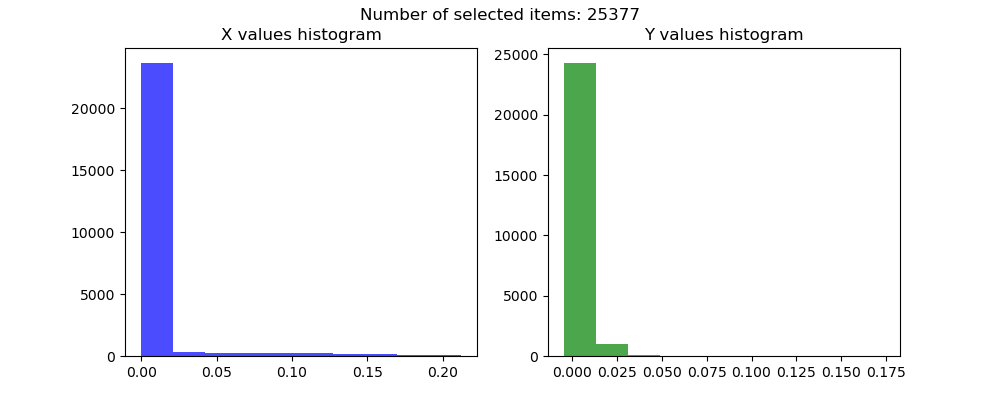

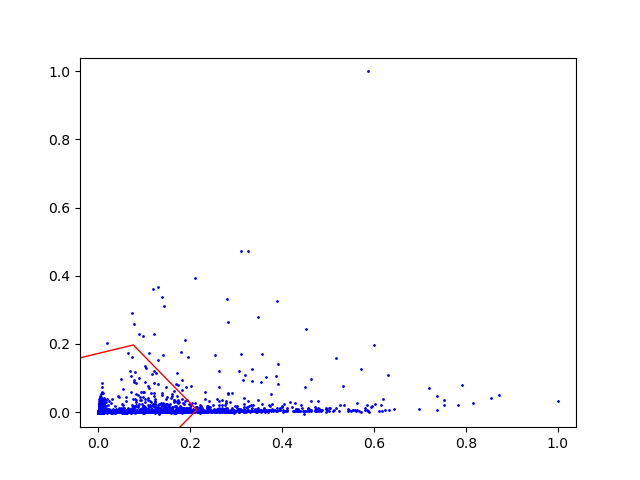

In [65]:
gate2 = InteractivePolygonGating(df2, 'FL5-A', 'FL11-A', num_edges=5)

In [57]:
gate2.selected_data

,FSC-H,FSC-A,SSC-H,SSC-A,FL5-H,FL5-A,FL11-H,FL11-A,FL8-H,FL8-A,FSC-Width,Time
667,4008568.50,0.143337,5653006.5,0.198920,5.902478e+05,0.229336,7057.799805,0.073066,671.099976,882.000000,4119.775391,8.218314e+04
2211,4046102.25,0.166415,5631485.5,0.203964,5.288204e+05,0.229654,20820.199219,0.120974,324.500000,724.700012,4738.716309,2.448501e+05
2315,4057093.00,0.153383,5650050.5,0.205329,3.369115e+05,0.164958,21324.900391,0.212077,588.900024,457.600006,4355.792969,2.477421e+05
2368,4168708.75,0.109415,5650150.0,0.149908,5.806092e+05,0.166102,11062.000000,0.072790,450.899994,-22.200001,3023.977783,2.485941e+05
5917,4014747.00,0.200681,5649798.5,0.298835,5.024504e+05,0.340641,16786.000000,0.140881,379.700012,21.799999,5759.084961,4.190272e+05
6032,3954533.50,0.095476,5572947.0,0.106865,5.562646e+05,0.148782,17981.099609,0.115393,351.600006,180.100006,2781.664062,4.282422e+05
6446,4104285.00,0.277996,5636373.0,0.410776,3.136410e+05,0.183795,27152.900391,0.171486,464.899994,799.000000,7803.812012,5.026552e+05
8331,3955011.00,0.092104,5625965.5,0.109277,5.869472e+05,0.150187,12937.900391,0.078498,296.600006,-87.800003,2683.082275,5.990591e+05
8545,4030229.25,0.186828,5648184.0,0.262089,4.775799e+05,0.252749,8481.400391,0.054562,368.399994,51.000000,5340.925781,6.115101e+05
9476,4075349.50,0.126409,5037801.5,0.124863,6.222961e+05,0.245982,6476.500000,0.054790,401.500000,307.100006,3573.694824,6.832851e+05


In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.patches import Polygon
# from matplotlib.path import Path

# class InteractivePolygonSelector:
#     def __init__(self, dataframe, x_col, y_col, num_edges=4, log_log=False):
#         self.dataframe = dataframe
#         self.x_col = x_col
#         self.y_col = y_col
#         self.num_edges = num_edges
#         self.log_log = log_log
        
#         self.x = dataframe[x_col].values
#         self.y = dataframe[y_col].values
        
#         self.dragging_vertex = None
        
#         self.init_plot()
#         self.init_polygon()
#         self.init_histograms()
#         self.connect_events()
#         self.update_histograms()

#         plt.show()

#     def init_plot(self):
#         self.fig, self.ax = plt.subplots()
#         self.sc = self.ax.scatter(self.x, self.y, s=1, c='blue')
        
#         if self.log_log:
#             self.ax.set_xscale('log')
#             self.ax.set_yscale('log')
        
#         self.ax.set_xlim(max(1,min(self.x)), max(self.x))
#         self.ax.set_ylim(max(1,min(self.y)), max(self.y))


#     def init_polygon(self):
#         theta = np.linspace(0, 2*np.pi, self.num_edges, endpoint=False)
#         radius = 0.1 * min(max(self.x), max(self.y))
#         mean_x = max(1+radius, np.mean(self.x[self.x > 0])) if self.log_log else np.mean(self.x)
#         mean_y = max(1+radius, np.mean(self.y[self.y > 0])) if self.log_log else np.mean(self.y)
#         # radius = 0.2 * min(max(self.x) - min(self.x), max(self.y) - min(self.y))
#         # mean_x = np.mean(self.x[self.x > 0]) if self.log_log else np.mean(self.x)
#         # mean_y = np.mean(self.y[self.y > 0]) if self.log_log else np.mean(self.y)
      
#         self.polygon_vertices = np.column_stack(
#             (radius * np.cos(theta) + mean_x, radius * np.sin(theta) + mean_y))
#         self.polygon = Polygon(self.polygon_vertices, closed=True, linewidth=1, edgecolor='r', facecolor='none')
#         self.ax.add_patch(self.polygon)
        

#     def init_histograms(self):
#         self.fig_hist, (self.ax_histx, self.ax_histy) = plt.subplots(1, 2, figsize=(10, 4))
#         self.ax_histx.set_title('X values histogram')
#         self.ax_histy.set_title('Y values histogram')

#     def update_histograms(self):
#         enclosed_x = []
#         enclosed_y = []
#         path = Path(self.polygon.get_xy())
#         for i in range(len(self.x)):
#             if path.contains_point((self.x[i], self.y[i])):
#                 enclosed_x.append(self.x[i])
#                 enclosed_y.append(self.y[i])

#         self.ax_histx.clear()
#         self.ax_histx.hist(enclosed_x, bins=10, color='blue', alpha=0.7)
#         self.ax_histx.set_title('X values histogram')

#         self.ax_histy.clear()
#         self.ax_histy.hist(enclosed_y, bins=10, color='green', alpha=0.7)
#         self.ax_histy.set_title('Y values histogram')

#         self.fig_hist.canvas.draw()

#     def on_press(self, event):
#         if event.inaxes != self.ax:
#             return
#         for i, (vx, vy) in enumerate(self.polygon.get_xy()):
#             if np.hypot(event.xdata - vx, event.ydata - vy) < 0.05:
#                 self.dragging_vertex = i
#                 break

#     def on_release(self, event):
#         self.dragging_vertex = None
#         self.update_histograms()

#     def on_motion(self, event):
#         if self.dragging_vertex is None:
#             return
#         if event.inaxes != self.ax:
#             return
#         self.polygon_vertices[self.dragging_vertex] = [event.xdata, event.ydata]
#         self.polygon.set_xy(self.polygon_vertices)
#         self.fig.canvas.draw()

#     def connect_events(self):
#         self.fig.canvas.mpl_connect('button_press_event', self.on_press)
#         self.fig.canvas.mpl_connect('button_release_event', self.on_release)
#         self.fig.canvas.mpl_connect('motion_notify_event', self.on_motion)

#     def get_enclosed_points(self):
#         path = Path(self.polygon.get_xy())
#         mask = np.array([path.contains_point(point) for point in zip(self.x, self.y)])
#         return self.dataframe[mask]

# # Generate example dataframe
# np.random.seed(0)
# data = {
#     'x': np.random.normal(0.5, 0.1, 60000),
#     'y': np.random.normal(0.5, 0.1, 60000)
# }
# df = pd.DataFrame(data)

# # Create an instance of the class with log-log plot enabled
# selector = InteractivePolygonSelector(df, 'x', 'y', num_edges=5, log_log=True)

# # Retrieve the enclosed points as a DataFrame
# enclosed_points_df = selector.get_enclosed_points()
# print(enclosed_points_df)


In [6]:
# Retrieve the enclosed points as a DataFrame
enclosed_points_df = selector.get_enclosed_points()
print(enclosed_points_df)

NameError: name 'selector' is not defined

In [ ]:
# !pip install FlowCal

          FSC-H         FSC-A         SSC-H         SSC-A        FL5-H  \
0  1.245440e+06  1.137749e+06  1.086676e+06  1.028578e+06   896.400024   
1  7.647308e+05  6.140952e+05  9.600986e+05  9.628853e+05   881.700012   
2  8.269922e+05  7.753288e+05  1.360484e+06  1.991305e+06  1384.400024   
3  7.939202e+05  6.101078e+05  3.554681e+05  3.603632e+05   584.400024   
4  6.853442e+05  5.623178e+05  4.422121e+05  4.119752e+05  1272.400024   

        FL5-A      FL11-H      FL11-A       FL8-H       FL8-A   FSC-Width  \
0  -62.700001  154.600006   67.500000  608.700012  356.299988  935.456116   
1 -147.800003  281.799988  322.899994  430.899994   27.700001  822.296021   
2  682.299988  506.600006  420.500000  352.700012   88.300003  960.029114   
3 -353.700012  330.600006   20.000000  312.700012   64.800003  786.918152   
4   26.299999  250.600006  137.000000  296.700012 -113.699997  840.181152   

           Time  
0  29919.144531  
1  30455.144531  
2  30782.144531  
3  31684.144531  
4 

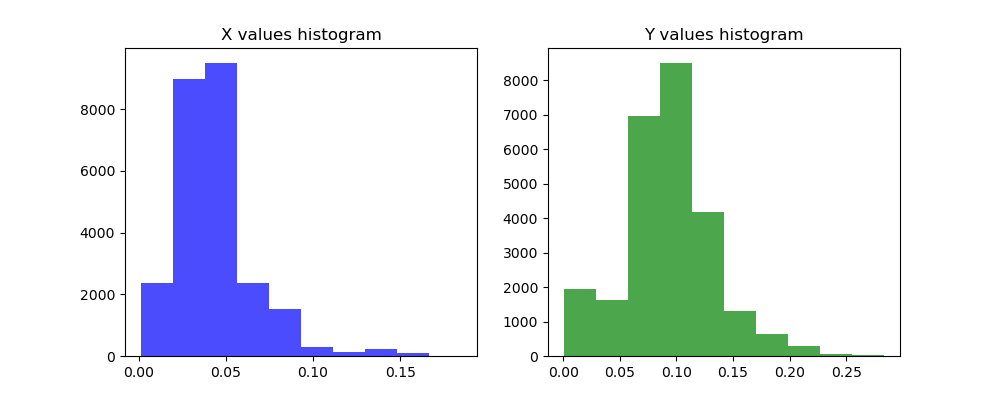

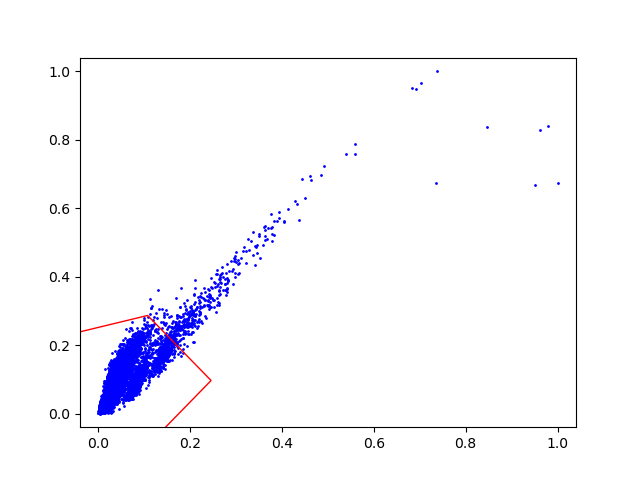

In [17]:
import FlowCal
import pandas as pd

# Read the .facs file
file_path = r'/Volumes/khammash/MC/cytoflex/Exp_20240417/Exp_20240417_1/data/01-016_high-G1.fcs'
data = FlowCal.io.FCSData(file_path)

# Convert to a pandas DataFrame
df = pd.DataFrame(data, columns=data.channels)
print(df.head())

# Filter the DataFrame

filtered_df = df[(df['FSC-A'] > 0) & (df['SSC-A'] > 0)]

# selector = InteractivePolygonSelector(df, 'FSC-A', 'SSC-A', num_edges=5, log_log=True)
selector = interactive_polygon_histograms(filtered_df, 'FSC-A', 'SSC-A', num_edges=5)

In [19]:
type(selector)

NoneType

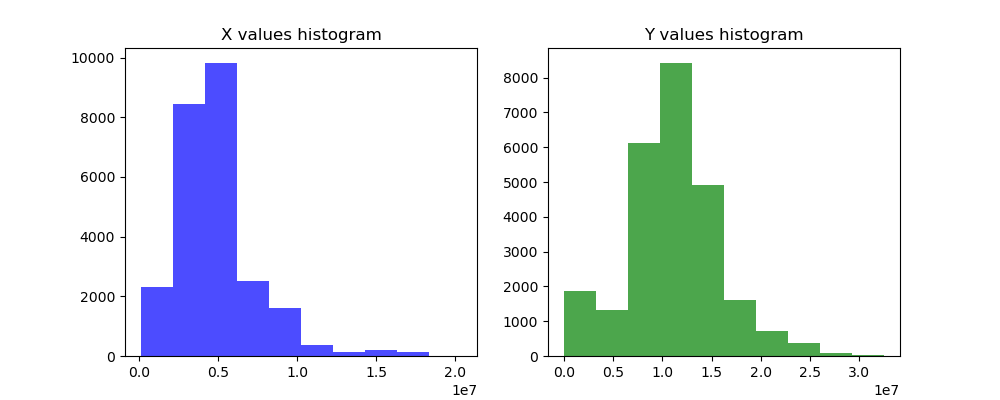

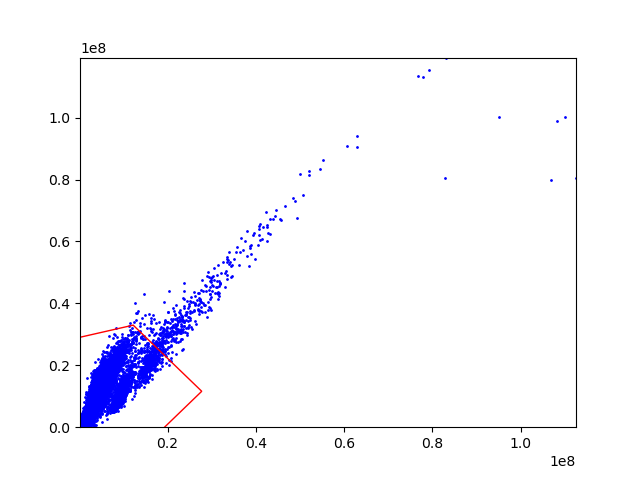

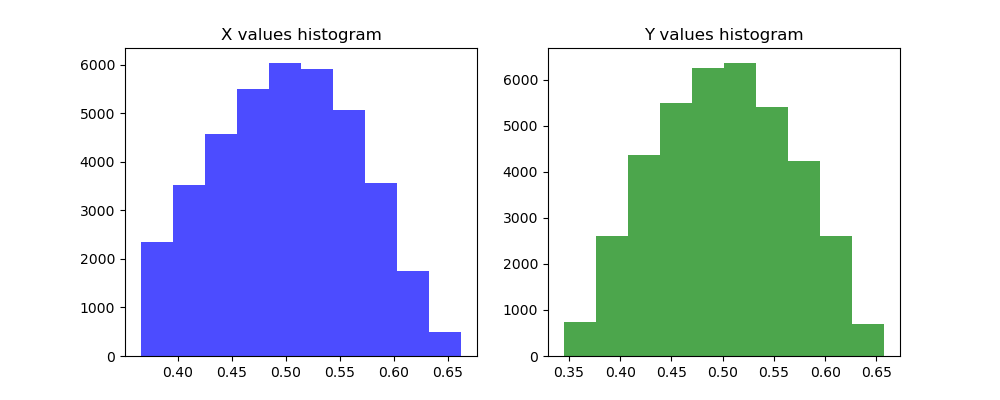

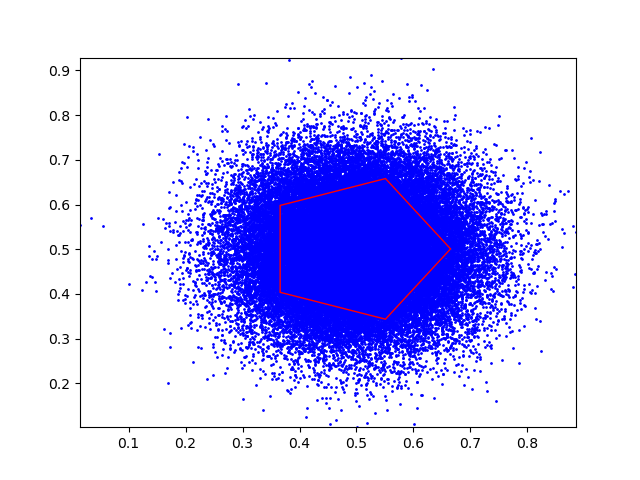

In [20]:
np.random.seed(0)
data = {
    'x': np.random.normal(0.5, 0.1, 60000),
    'y': np.random.normal(0.5, 0.1, 60000)
}
df = pd.DataFrame(data)

# Call the function with the example dataframe
interactive_polygon_histograms(df, 'x', 'y', num_edges=5)

In [127]:
!pip install --upgrade notebook
!jupyter --version

   ---------------------------------------- 0.0/5.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.0 MB ? eta -:--:--
    --------------------------------------- 0.1/5.0 MB 1.7 MB/s eta 0:00:03
   --- ------------------------------------ 0.4/5.0 MB 4.4 MB/s eta 0:00:02
   ------ --------------------------------- 0.8/5.0 MB 6.1 MB/s eta 0:00:01
   --------- ------------------------------ 1.2/5.0 MB 7.1 MB/s eta 0:00:01
   -------------- ------------------------- 1.8/5.0 MB 8.7 MB/s eta 0:00:01
   ------------------- -------------------- 2.4/5.0 MB 10.2 MB/s eta 0:00:01
   ------------------------- -------------- 3.2/5.0 MB 11.5 MB/s eta 0:00:01
   --------------------------------- ------ 4.2/5.0 MB 13.5 MB/s eta 0:00:01
   ---------------------------------------  5.0/5.0 MB 14.6 MB/s eta 0:00:01
   ---------------------------------------- 5.0/5.0 MB 13.4 MB/s eta 0:00:00
Selected Jupyter core packages...
IPython          : 8.25.0
ipykernel        : 6.28.0
ipywidgets 

In [77]:
array = np.array([[1,2,3],[4,5,6]]);
threshold = 2
np.maximum(1,(array > threshold).sum(axis = 0))

array([1, 1, 2])

In [ ]:
!conda install -c conda-forge nodejs

In [ ]:
!jupyter labextension install @jupyter-widgets/jupyterlab-manager

In [ ]:
!python.exe -m pip install --upgrade pip
!pip install ipympl

!jupyter labextension install @jupyter-widgets/jupyterlab-manager
!jupyter labextension install jupyter-matplotlib

          FSC-H         FSC-A         SSC-H         SSC-A        FL5-H  \
0  1.245440e+06  1.137749e+06  1.086676e+06  1.028578e+06   896.400024   
1  7.647308e+05  6.140952e+05  9.600986e+05  9.628853e+05   881.700012   
2  8.269922e+05  7.753288e+05  1.360484e+06  1.991305e+06  1384.400024   
3  7.939202e+05  6.101078e+05  3.554681e+05  3.603632e+05   584.400024   
4  6.853442e+05  5.623178e+05  4.422121e+05  4.119752e+05  1272.400024   

        FL5-A      FL11-H      FL11-A       FL8-H       FL8-A   FSC-Width  \
0  -62.700001  154.600006   67.500000  608.700012  356.299988  935.456116   
1 -147.800003  281.799988  322.899994  430.899994   27.700001  822.296021   
2  682.299988  506.600006  420.500000  352.700012   88.300003  960.029114   
3 -353.700012  330.600006   20.000000  312.700012   64.800003  786.918152   
4   26.299999  250.600006  137.000000  296.700012 -113.699997  840.181152   

           Time  
0  29919.144531  
1  30455.144531  
2  30782.144531  
3  31684.144531  
4 

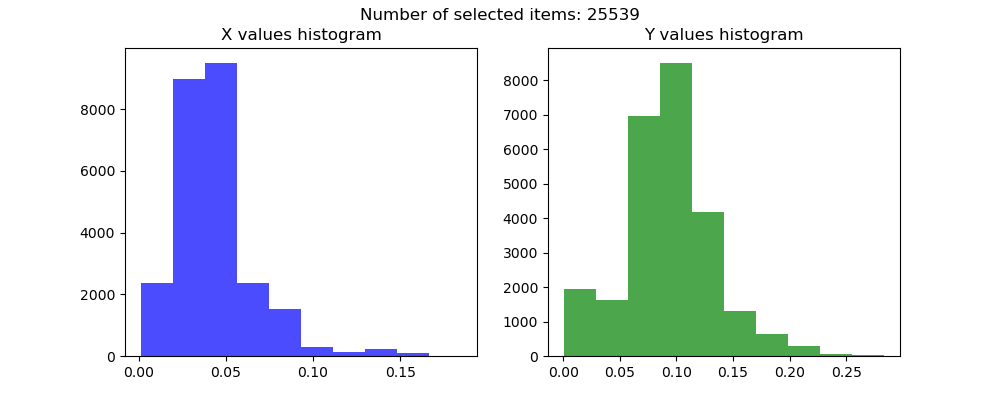

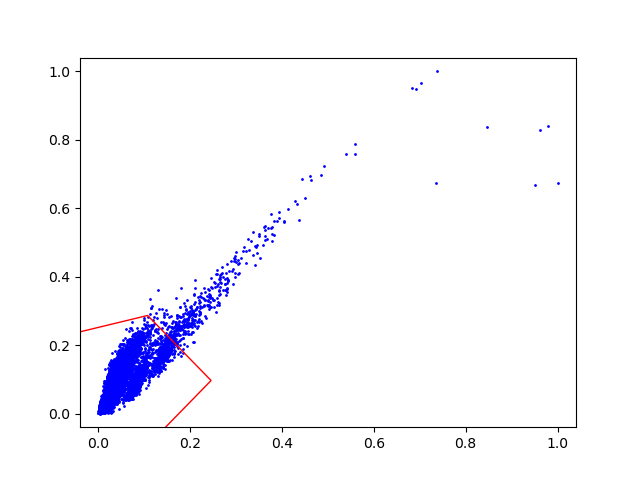

In [7]:
# Not checked yet
# Not to store another gating strategy, but store the current gating strategy, and could be potentiallly used by other dataset later automatically
# Keep storing the polygon vertices in normalized space.
# Add a method apply_gate() in the class that applies the saved gating polygon to a new DataFrame by normalizing and checking which points lie inside.
import FlowCal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import Polygon

class InteractivePolygonGating:
    def __init__(self, dataframe, x_col, y_col, num_edges=4):
        self.df = dataframe
        self.x_col = x_col
        self.y_col = y_col
        self.num_edges = num_edges
        self.selected_data = None

        # Normalize
        self.x = self.df[self.x_col].values
        self.y = self.df[self.y_col].values
        
        # Store the scaling factor
        self.x_max = self.x.max()
        self.y_max = self.y.max()

        self.x /= self.x.max()
        self.y /= self.y.max()



        plt.ion()

        self.fig, self.ax = plt.subplots()
        self.ax.scatter(self.x, self.y, s=1, c='blue')

        # Polygon
        theta = np.linspace(0, 2*np.pi, self.num_edges, endpoint=False)
        radius = 0.2 * min(self.x.max() - self.x.min(), self.y.max() - self.y.min())
        cx, cy = np.mean(self.x), np.mean(self.y)
        self.polygon_vertices = np.column_stack((radius*np.cos(theta) + cx,
                                                 radius*np.sin(theta) + cy))
        self.polygon = Polygon(self.polygon_vertices, closed=True,
                               linewidth=1, edgecolor='r', facecolor='none')
        self.ax.add_patch(self.polygon)

        pad = 0.2 * radius
        self.ax.set_xlim(self.x.min() - pad, self.x.max() + pad)
        self.ax.set_ylim(self.y.min() - pad, self.y.max() + pad)

        self.fig_hist, (self.ax_histx, self.ax_histy) = plt.subplots(1, 2, figsize=(10, 4))
        self.dragging_vertex = None

        self.update_histograms()

        self.fig.canvas.mpl_connect('button_press_event', self.on_press)
        self.fig.canvas.mpl_connect('button_release_event', self.on_release)
        self.fig.canvas.mpl_connect('motion_notify_event', self.on_motion)

        plt.show(block=False)

    def on_press(self, event):
        if event.inaxes != self.ax:
            return
        for i, (vx, vy) in enumerate(self.polygon.get_xy()):
            if np.hypot(event.xdata - vx, event.ydata - vy) < 0.05:
                self.dragging_vertex = i
                break

    def on_release(self, event):
        self.dragging_vertex = None
        self.update_histograms()

    def on_motion(self, event):
        if self.dragging_vertex is None or event.inaxes != self.ax:
            return
        self.polygon_vertices[self.dragging_vertex] = [event.xdata, event.ydata]
        self.polygon.set_xy(self.polygon_vertices)
        self.fig.canvas.draw()

    def update_histograms(self):
        enclosed_indices = []
        path = Path(self.polygon.get_xy())
        for i in range(len(self.x)):
            if path.contains_point((self.x[i], self.y[i])):
                enclosed_indices.append(i)
        self.selected_data = self.df.iloc[enclosed_indices]

        self.ax_histx.clear()
        self.ax_histx.hist(self.x[enclosed_indices], bins=10, color='blue', alpha=0.7)
        self.ax_histx.set_title('X values histogram')

        self.ax_histy.clear()
        self.ax_histy.hist(self.y[enclosed_indices], bins=10, color='green', alpha=0.7)
        self.ax_histy.set_title('Y values histogram')

        self.fig_hist.suptitle(f"Number of selected items: {len(enclosed_indices)}")
        self.fig_hist.canvas.draw()

    def apply_gate(self, new_df, x_col=None, y_col=None):
        if x_col is None: x_col = self.x_col
        if y_col is None: y_col = self.y_col

        new_x = new_df[x_col].values
        new_y = new_df[y_col].values
        new_x_temp = new_x/self.x_max if self.x_max != 0 else 1
        new_y_temp = new_y/self.y_max if self.y_max != 0 else 1

        path = Path(self.polygon.get_xy())
        enclosed_indices = []
        for i in range(len(new_x_temp)):
            if path.contains_point((new_x_temp[i], new_y_temp[i])):
                enclosed_indices.append(i)

        return new_df.iloc[enclosed_indices]


# Read the .facs file
file_path = r'/Volumes/khammash/MC/cytoflex/Exp_20240417/Exp_20240417_1/data/01-016_high-G1.fcs'
data = FlowCal.io.FCSData(file_path)

# Convert to a pandas DataFrame
df = pd.DataFrame(data, columns=data.channels)
print(df.head())

# Filter the DataFrame

filtered_df = df[(df['FSC-A'] > 0) & (df['SSC-A'] > 0)]

# selector = InteractivePolygonSelector(df, 'FSC-A', 'SSC-A', num_edges=5, log_log=True)
gate1 = InteractivePolygonGating(filtered_df, 'FSC-A', 'SSC-A', num_edges=5)

In [8]:
gate1.selected_data


,FSC-H,FSC-A,SSC-H,SSC-A,FL5-H,FL5-A,FL11-H,FL11-A,FL8-H,FL8-A,FSC-Width,Time
0,1.245440e+06,0.010112,1.086676e+06,0.008615,896.400024,-62.700001,154.600006,67.500000,608.700012,356.299988,935.456116,2.991914e+04
1,7.647308e+05,0.005458,9.600986e+05,0.008065,881.700012,-147.800003,281.799988,322.899994,430.899994,27.700001,822.296021,3.045514e+04
2,8.269922e+05,0.006891,1.360484e+06,0.016679,1384.400024,682.299988,506.600006,420.500000,352.700012,88.300003,960.029114,3.078214e+04
3,7.939202e+05,0.005423,3.554681e+05,0.003018,584.400024,-353.700012,330.600006,20.000000,312.700012,64.800003,786.918152,3.168414e+04
4,6.853442e+05,0.004998,4.422121e+05,0.003451,1272.400024,26.299999,250.600006,137.000000,296.700012,-113.699997,840.181152,3.204914e+04
...,...,...,...,...,...,...,...,...,...,...,...,...
25960,3.043412e+06,0.057368,5.653064e+06,0.158038,7204.700195,11239.299805,2832.100098,5274.299805,621.799988,608.700012,2171.784424,1.698905e+06
25961,2.122984e+06,0.035162,5.651178e+06,0.119996,6185.899902,9812.299805,1533.300049,2814.500000,419.000000,395.799988,1908.235229,1.698943e+06
25962,2.960856e+06,0.039078,5.609652e+06,0.069173,5631.700195,6293.700195,946.099976,1462.599976,414.600006,325.200012,1520.624023,1.699458e+06
25963,3.236555e+06,0.059445,5.653456e+06,0.119545,4781.500000,7572.899902,1426.099976,2293.199951,541.099976,279.100006,2116.115967,1.699500e+06


In [32]:
gate1.apply_gate(df)

,FSC-H,FSC-A,SSC-H,SSC-A,FL5-H,FL5-A,FL11-H,FL11-A,FL8-H,FL8-A,FSC-Width,Time
0,1.245440e+06,1.137749e+06,1.086676e+06,1.028578e+06,896.400024,-62.700001,154.600006,67.500000,608.700012,356.299988,935.456116,2.991914e+04
1,7.647308e+05,6.140952e+05,9.600986e+05,9.628853e+05,881.700012,-147.800003,281.799988,322.899994,430.899994,27.700001,822.296021,3.045514e+04
2,8.269922e+05,7.753288e+05,1.360484e+06,1.991305e+06,1384.400024,682.299988,506.600006,420.500000,352.700012,88.300003,960.029114,3.078214e+04
3,7.939202e+05,6.101078e+05,3.554681e+05,3.603632e+05,584.400024,-353.700012,330.600006,20.000000,312.700012,64.800003,786.918152,3.168414e+04
4,6.853442e+05,5.623178e+05,4.422121e+05,4.119752e+05,1272.400024,26.299999,250.600006,137.000000,296.700012,-113.699997,840.181152,3.204914e+04
...,...,...,...,...,...,...,...,...,...,...,...,...
25960,3.043412e+06,6.454713e+06,5.653064e+06,1.886864e+07,7204.700195,11239.299805,2832.100098,5274.299805,621.799988,608.700012,2171.784424,1.698905e+06
25961,2.122984e+06,3.956205e+06,5.651178e+06,1.432673e+07,6185.899902,9812.299805,1533.300049,2814.500000,419.000000,395.799988,1908.235229,1.698943e+06
25962,2.960856e+06,4.396826e+06,5.609652e+06,8.258806e+06,5631.700195,6293.700195,946.099976,1462.599976,414.600006,325.200012,1520.624023,1.699458e+06
25963,3.236555e+06,6.688398e+06,5.653456e+06,1.427288e+07,4781.500000,7572.899902,1426.099976,2293.199951,541.099976,279.100006,2116.115967,1.699500e+06


In [31]:
df

,FSC-H,FSC-A,SSC-H,SSC-A,FL5-H,FL5-A,FL11-H,FL11-A,FL8-H,FL8-A,FSC-Width,Time
0,1.245440e+06,1.137749e+06,1.086676e+06,1.028578e+06,896.400024,-62.700001,154.600006,67.500000,608.700012,356.299988,935.456116,2.991914e+04
1,7.647308e+05,6.140952e+05,9.600986e+05,9.628853e+05,881.700012,-147.800003,281.799988,322.899994,430.899994,27.700001,822.296021,3.045514e+04
2,8.269922e+05,7.753288e+05,1.360484e+06,1.991305e+06,1384.400024,682.299988,506.600006,420.500000,352.700012,88.300003,960.029114,3.078214e+04
3,7.939202e+05,6.101078e+05,3.554681e+05,3.603632e+05,584.400024,-353.700012,330.600006,20.000000,312.700012,64.800003,786.918152,3.168414e+04
4,6.853442e+05,5.623178e+05,4.422121e+05,4.119752e+05,1272.400024,26.299999,250.600006,137.000000,296.700012,-113.699997,840.181152,3.204914e+04
...,...,...,...,...,...,...,...,...,...,...,...,...
25960,3.043412e+06,6.454713e+06,5.653064e+06,1.886864e+07,7204.700195,11239.299805,2832.100098,5274.299805,621.799988,608.700012,2171.784424,1.698905e+06
25961,2.122984e+06,3.956205e+06,5.651178e+06,1.432673e+07,6185.899902,9812.299805,1533.300049,2814.500000,419.000000,395.799988,1908.235229,1.698943e+06
25962,2.960856e+06,4.396826e+06,5.609652e+06,8.258806e+06,5631.700195,6293.700195,946.099976,1462.599976,414.600006,325.200012,1520.624023,1.699458e+06
25963,3.236555e+06,6.688398e+06,5.653456e+06,1.427288e+07,4781.500000,7572.899902,1426.099976,2293.199951,541.099976,279.100006,2116.115967,1.699500e+06
